In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#merge datasets into a complete data set
data_files = r"C:\Users\myabe\Downloads\data"
accounts_df = pd.read_csv(os.path.join(data_files, "accounts.csv"))
products_df = pd.read_csv(os.path.join(data_files, "products.csv"))
sales_pipeline_df = pd.read_csv(os.path.join(data_files, "sales_pipeline.csv"))
sales_teams_df = pd.read_csv(os.path.join(data_files, "sales_teams.csv"))

In [ ]:
#drop any of thee clolumns that may be duplicated
accounts_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
sales_pipeline_df.drop_duplicates(inplace=True)
sales_teams_df.drop_duplicates(inplace=True)
     

In [4]:
#
sales_pipeline_df['product'] = sales_pipeline_df['product'].replace("GTXPro", "GTX Pro")

In [5]:
#Verifying that worked as intended
print(sales_pipeline_df['product'].unique())

['GTX Plus Basic' 'GTX Pro' 'MG Special' 'GTX Basic' 'MG Advanced'
 'GTX Plus Pro' 'GTK 500']


In [6]:
#
merged_df = (
  sales_pipeline_df
  .merge(sales_teams_df, on="sales_agent", how="left")
  .merge(products_df, on="product", how="left")
  .merge(accounts_df, on="account", how="left")
)
print(merged_df.shape)
merged_df.head(10)

(8800, 18)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,manager,regional_office,series,sales_price,sector,year_established,revenue,employees,office_location,subsidiary_of
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,Dustin Brinkmann,Central,GTX,1096,retail,2001.0,718.62,2448.0,United States,NaN
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,Melvin Marxen,Central,GTX,4821,medical,2002.0,3178.24,4540.0,United States,NaN
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,Melvin Marxen,Central,MG,55,retail,2001.0,718.62,2448.0,United States,NaN
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,Dustin Brinkmann,Central,GTX,550,software,1998.0,2714.90,2641.0,United States,Acme Corporation
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,Summer Sewald,West,GTX,550,services,1982.0,792.46,1299.0,United States,NaN
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0,Dustin Brinkmann,Central,MG,55,medical,1992.0,3922.42,6837.0,United States,NaN
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0,Celia Rouche,West,MG,55,retail,1989.0,1388.67,3583.0,United States,NaN
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0,Celia Rouche,West,GTX,550,entertainment,1993.0,4269.90,6472.0,United States,Massive Dynamic
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0,Melvin Marxen,Central,GTX,1096,medical,1984.0,441.08,1210.0,United States,NaN
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN,Summer Sewald,West,MG,3393,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
merged_df["engage_date"]=pd.to_datetime(merged_df["engage_date"], errors="coerce")
merged_df["close_date"]=pd.to_datetime(merged_df["close_date"], errors="coerce")

In [8]:
categorical_columns = merged_df.select_dtypes(include="object").columns
numerical_columns = merged_df.select_dtypes(include="float64").columns
#Handling missing values in categorical variables with mode imputation
for col in categorical_columns:
  merged_df[col]=merged_df[col].fillna(merged_df[col].mode()[0])

#Handling missing values in numerical variables with median imputation
for col in numerical_columns:
  if col not in["close_value", "close_date", "engage_date"] : # close_value should not be replaced with fake values, since a null value means the deal hasn't been closed yet.
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

In [9]:
merged_df.isnull().sum()

opportunity_id         0
sales_agent            0
product                0
account                0
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
manager                0
regional_office        0
series                 0
sales_price            0
sector                 0
year_established       0
revenue                0
employees              0
office_location        0
subsidiary_of          0
dtype: int64

In [10]:
# Summary statistics for numerical features
display(merged_df.describe().T)

# Summary statistics for categorical features however, only if any exist
cat_cols = merged_df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    display(merged_df[cat_cols].describe().T)
else:
    print("No categorical columns to summarize.")

#evaluate features most correlated with close_value (deals completed)
if "close_value" in merged_df.columns:
    corr = merged_df.corr(numeric_only=True)["close_value"].sort_values(ascending=False)
    display(corr)

,count,mean,min,25%,50%,75%,max,std
engage_date,8300,2017-06-14 08:35:06.216867584,2016-10-20 00:00:00,2017-04-04 00:00:00,2017-06-24 00:00:00,2017-08-27 00:00:00,2017-12-27 00:00:00,NaN
close_date,6711,2017-08-01 03:32:25.641484032,2017-03-01 00:00:00,2017-05-18 00:00:00,2017-08-02 00:00:00,2017-10-18 00:00:00,2017-12-31 00:00:00,NaN
close_value,6711.0,1490.915512,0.0,0.0,472.0,3225.0,30288.0,2320.670773
sales_price,8800.0,2379.109659,55.0,550.0,1096.0,4821.0,26768.0,2629.243384
year_established,8800.0,1995.405341,1979.0,1990.0,1995.0,2000.0,2017.0,8.412247
revenue,8800.0,2342.938873,4.54,718.62,1698.2,2819.5,11698.03,2393.473911
employees,8800.0,5343.471477,9.0,1588.0,3492.0,6472.0,34288.0,6293.18949


,count,unique,top,freq
opportunity_id,8800,8800,1C1I7A6R,1
sales_agent,8800,30,Darcel Schlecht,747
product,8800,7,GTX Basic,1866
account,8800,85,Hottechi,1625
deal_stage,8800,4,Won,4238
manager,8800,6,Melvin Marxen,1929
regional_office,8800,3,Central,3512
series,8800,3,GTX,5697
sector,8800,10,retail,2822
office_location,8800,15,United States,7545


close_value         1.000000
sales_price         0.679396
employees           0.035061
revenue             0.028136
year_established   -0.025376
Name: close_value, dtype: float64

In [11]:
merged_df["has_close_date"] = merged_df["close_date"].notna().astype(int)
#Flagging deals without a close date
#Informative for Opportunity Win Prediction model, so that the model knows if the deal isn't closed yet

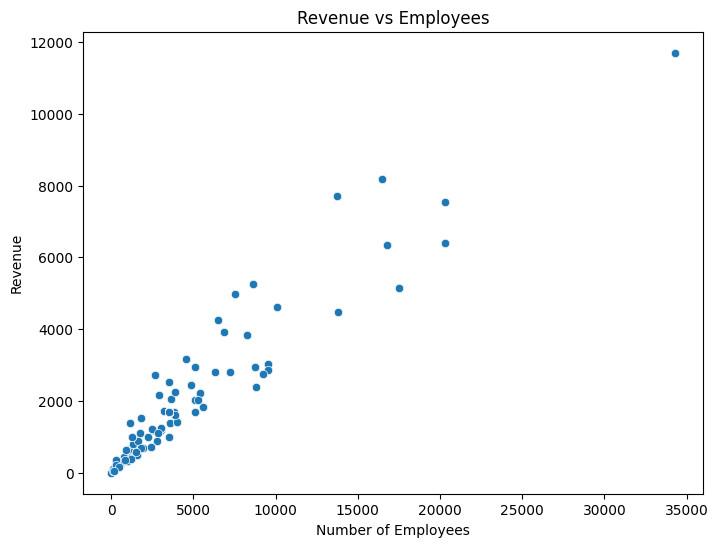

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="employees", y="revenue")
plt.title("Revenue vs Employees")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue")
plt.show()
#Linear relationship between the number of employees and the revenue!

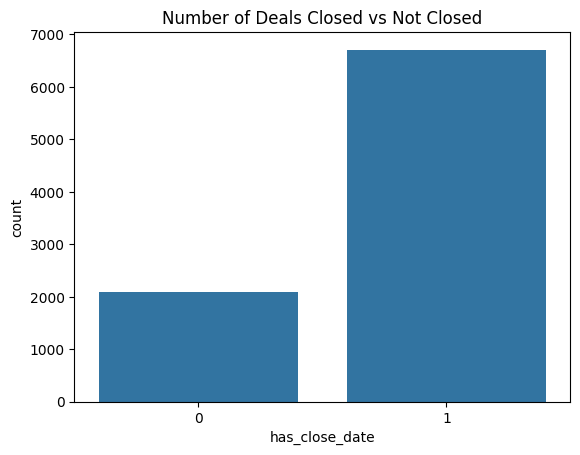

In [13]:
sns.countplot(x='has_close_date', data=merged_df)
plt.title("Number of Deals Closed vs Not Closed")
plt.show()

In [14]:
missing_summary = merged_df.isnull().sum()
print(missing_summary[missing_summary > 0])

engage_date     500
close_date     2089
close_value    2089
dtype: int64


In [15]:
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype(str).str.strip().str.upper()

In [16]:
for col in numerical_columns:
  if col != "close_value": #close_value should not be replaced with fake values, since a null value means the deal hasn't been closed yet.
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3-Q1

    lower_side = Q1 -1.5 *IQR
    upper_side = Q3 +1.5 * IQR

    merged_df[col]=merged_df[col].clip(lower=lower_side, upper=upper_side)

In [17]:
cols_to_log = ["close_value", "revenue", "employees"]

for col in cols_to_log:
    merged_df[col + "_log"] = np.log1p(merged_df[col])

merged_df[["close_value", "close_value_log",
           "revenue", "revenue_log",
           "employees", "employees_log"]].head()

,close_value,close_value_log,revenue,revenue_log,employees,employees_log
0,1054.0,6.961296,718.62,6.578723,2448.0,7.803435
1,4514.0,8.415160,3178.24,8.064397,4540.0,8.420903
2,50.0,3.931826,718.62,6.578723,2448.0,7.803435
3,588.0,6.378426,2714.90,7.906879,2641.0,7.879291
4,517.0,6.249975,792.46,6.676403,1299.0,7.170120


In [18]:
label_enc = LabelEncoder()
cols_to_label_encode = ["sales_agent", "account", "office_location"] # only label encode columns that have too many unique values to one-hot encode

for col in cols_to_label_encode:
    merged_df[col] = label_enc.fit_transform(merged_df[col])
    
# Columns we will one-hot encode
cols_to_one_hot = ["product", "manager", "regional_office", "series", "sector", "subsidiary_of", "deal_stage"]

# Perform one-hot encoding using pandas.get_dummies
merged_df = pd.get_dummies(merged_df, columns=cols_to_one_hot, drop_first=False, dtype=int)

In [19]:
# Standardize numbers -> only sales price
scaler = StandardScaler()
merged_df["sales_price_scaled"] = scaler.fit_transform(merged_df[["sales_price"]])

In [20]:
# Bin years into decades (e.g. 1996 → 1990s)
merged_df["year_established_decade"] = (
    (merged_df["year_established"] // 10).astype(int) * 10
).astype(str) + "s"

# One-hot encode the binned decades
merged_df = pd.get_dummies(
    merged_df,
    columns=["year_established_decade"],
    prefix="decade",
    prefix_sep="_"
    , dtype=int
)

In [21]:
#These features can highlight patterns like deals closing faster in some months
#days_to_close can help with the opportunity win prediction model, as a longer vs. shorter deal cycle can be correlated with success

# Features derived from dates
merged_df["engage_year"] = merged_df["engage_date"].dt.year
merged_df["engage_month"] = merged_df["engage_date"].dt.month
merged_df["engage_dayofweek"] = merged_df["engage_date"].dt.dayofweek

#if there was no close date, then this will be NaN
merged_df["days_to_close"] = (merged_df["close_date"] - merged_df["engage_date"]).dt.days

#date/timeline features
if "engage_date" in merged_df.columns and "close_date" in merged_df.columns:
    #time between engagement and closing
    merged_df["days_to_close"] = (merged_df["close_date"] - merged_df["engage_date"]).dt.days
    #flag for deals closed within 30 days
    merged_df["closed_within_30d"] = merged_df["days_to_close"].apply(lambda x: 1 if pd.notnull(x) and x <= 30 else 0)

# Features derived from account, can be useful for Lead Scoring & Account Health models
current_year = pd.Timestamp.now().year
merged_df["account_age"] = current_year - merged_df["year_established"]

In [22]:
#Features derived from numerical columns
# Revenue per employee
merged_df["rev_per_employee"] = merged_df.apply(
    lambda x: x["revenue"] / x["employees"] if x["employees"] > 0 else np.nan, axis=1
)
#Can be used for account health scoring model, as accounts that have higher revenue for each employee can indicate stronger clients or more efficiency

In [23]:
#interaction count per account
if "account" in merged_df.columns:
    account_interaction_counts = merged_df.groupby("account").size().rename("account_interaction_count")
    merged = merged_df.merge(account_interaction_counts, on="account", how="left")

#num of deals closed by agent
if "sales_agent" in merged_df.columns and "close_date" in merged_df.columns:
    agent_closed_deals = merged_df[merged_df["close_date"].notnull()].groupby("sales_agent").size().rename("agent_closed_deals")
    merged_df = merged_df.merge(agent_closed_deals, on="sales_agent", how="left")
    merged_df["agent_closed_deals"] = merged_df["agent_closed_deals"].fillna(0)

#opportunity win rate by account
if "account" in merged_df.columns and "close_value" in merged_df.columns:
    merged_df["won_deal"] = merged_df["close_value"].notnull().astype(int)
    win_rate = merged_df.groupby("account")["won_deal"].mean().rename("account_win_rate")
    merged_df = merged_df.merge(win_rate, on="account", how="left")

#avg deal size by product
if "product" in merged_df.columns and "close_value" in merged_df.columns:
    avg_deal_size = merged_df.groupby("product")["close_value"].mean().rename("avg_deal_size_by_product")
    merged_df = merged_df.merge(avg_deal_size, on="product", how="left")

In [24]:
# opportunity_id is the only column safe to remove because it is a unique identifier and has no predictive or explanatory value for the model.
merged_df.drop(columns=["opportunity_id"], inplace=True)

In [25]:
merged_df.isnull().sum()

sales_agent              0
account                  0
engage_date            500
close_date            2089
close_value           2089
                      ... 
account_age              0
rev_per_employee         0
agent_closed_deals       0
won_deal                 0
account_win_rate         0
Length: 70, dtype: int64

In [26]:
merged_df.shape

(8800, 70)

In [27]:
merged_df.head(10)

,sales_agent,account,engage_date,close_date,close_value,sales_price,year_established,revenue,employees,office_location,...,engage_year,engage_month,engage_dayofweek,days_to_close,closed_within_30d,account_age,rev_per_employee,agent_closed_deals,won_deal,account_win_rate
0,20,8,2016-10-20,2017-03-01,1054.0,1096,2001.0,718.62,2448.0,14,...,2016.0,10.0,3.0,132.0,0,24.0,0.293554,195,1,0.920792
1,6,38,2016-10-25,2017-03-11,4514.0,4821,2002.0,3178.24,4540.0,14,...,2016.0,10.0,1.0,137.0,0,23.0,0.700053,553,1,0.941176
2,6,8,2016-10-25,2017-03-07,50.0,55,2001.0,718.62,2448.0,14,...,2016.0,10.0,1.0,133.0,0,24.0,0.293554,553,1,0.920792
3,20,10,2016-10-25,2017-03-09,588.0,550,1998.0,2714.90,2641.0,14,...,2016.0,10.0,1.0,135.0,0,27.0,1.027982,195,1,0.966942
4,29,34,2016-10-25,2017-03-02,517.0,550,1982.0,792.46,1299.0,14,...,2016.0,10.0,1.0,128.0,0,43.0,0.610054,261,1,0.873563
5,0,58,2016-10-29,2017-03-01,49.0,55,1992.0,3922.42,6837.0,14,...,2016.0,10.0,5.0,123.0,0,33.0,0.573705,336,1,0.955357
6,26,40,2016-10-30,2017-03-02,57.0,55,1989.0,1388.67,3583.0,14,...,2016.0,10.0,6.0,123.0,0,36.0,0.387572,347,1,0.948052
7,17,9,2016-11-01,2017-03-07,601.0,550,1993.0,4269.90,6472.0,14,...,2016.0,11.0,1.0,126.0,0,32.0,0.659750,227,1,0.918367
8,21,84,2016-11-01,2017-03-03,1026.0,1096,1984.0,441.08,1210.0,14,...,2016.0,11.0,1.0,122.0,0,41.0,0.364529,175,1,0.904762
9,12,35,2016-11-03,NaT,NaN,3393,1995.0,1698.20,3492.0,14,...,2016.0,11.0,3.0,NaN,0,30.0,0.486312,206,0,0.118769


In [28]:
merged_df.columns

Index(['sales_agent', 'account', 'engage_date', 'close_date', 'close_value',
       'sales_price', 'year_established', 'revenue', 'employees',
       'office_location', 'has_close_date', 'close_value_log', 'revenue_log',
       'employees_log', 'product_GTK 500', 'product_GTX BASIC',
       'product_GTX PLUS BASIC', 'product_GTX PLUS PRO', 'product_GTX PRO',
       'product_MG ADVANCED', 'product_MG SPECIAL', 'manager_CARA LOSCH',
       'manager_CELIA ROUCHE', 'manager_DUSTIN BRINKMANN',
       'manager_MELVIN MARXEN', 'manager_ROCCO NEUBERT',
       'manager_SUMMER SEWALD', 'regional_office_CENTRAL',
       'regional_office_EAST', 'regional_office_WEST', 'series_GTK',
       'series_GTX', 'series_MG', 'sector_EMPLOYMENT', 'sector_ENTERTAINMENT',
       'sector_FINANCE', 'sector_MARKETING', 'sector_MEDICAL', 'sector_RETAIL',
       'sector_SERVICES', 'sector_SOFTWARE', 'sector_TECHNOLGY',
       'sector_TELECOMMUNICATIONS', 'subsidiary_of_ACME CORPORATION',
       'subsidiary_of_BUBBA

In [29]:
# Summary statistics for numerical features
display(merged_df.describe().T)

# Summary statistics for categorical features however, only if any exist
cat_cols = merged_df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    display(merged_df[cat_cols].describe().T)
else:
    print("No categorical columns to summarize.")

#evaluate features most correlated with close_value (deals completed)
if "close_value" in merged_df.columns:
    corr = merged_df.corr(numeric_only=True)["close_value"].sort_values(ascending=False)
    display(corr)

,count,mean,min,25%,50%,75%,max,std
sales_agent,8800.0,13.8975,0.0,6.0,14.0,21.0,29.0,8.678309
account,8800.0,39.986591,0.0,24.0,35.0,58.0,84.0,21.886514
engage_date,8300,2017-06-14 08:35:06.216867584,2016-10-20 00:00:00,2017-04-04 00:00:00,2017-06-24 00:00:00,2017-08-27 00:00:00,2017-12-27 00:00:00,NaN
close_date,6711,2017-08-01 03:32:25.641484032,2017-03-01 00:00:00,2017-05-18 00:00:00,2017-08-02 00:00:00,2017-10-18 00:00:00,2017-12-31 00:00:00,NaN
close_value,6711.0,1490.915512,0.0,0.0,472.0,3225.0,30288.0,2320.670773
...,...,...,...,...,...,...,...,...
account_age,8800.0,29.633295,10.0,25.0,30.0,35.0,46.0,8.31702
rev_per_employee,8800.0,0.493714,0.273103,0.390134,0.46391,0.546143,1.181803,0.17075
agent_closed_deals,8800.0,260.303068,79.0,194.0,232.0,275.0,553.0,109.013897
won_deal,8800.0,0.762614,0.0,1.0,1.0,1.0,1.0,0.425505


No categorical columns to summarize.


close_value               1.000000
close_value_log           0.703194
sales_price               0.679396
sales_price_scaled        0.679396
deal_stage_WON            0.490799
                            ...   
deal_stage_LOST          -0.490799
has_close_date                 NaN
deal_stage_ENGAGING            NaN
deal_stage_PROSPECTING         NaN
won_deal                       NaN
Name: close_value, Length: 68, dtype: float64

C:\Users\myabe\AppData\Local\Temp\ipykernel_24132\1471653815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr, y=corr.index, palette="coolwarm")


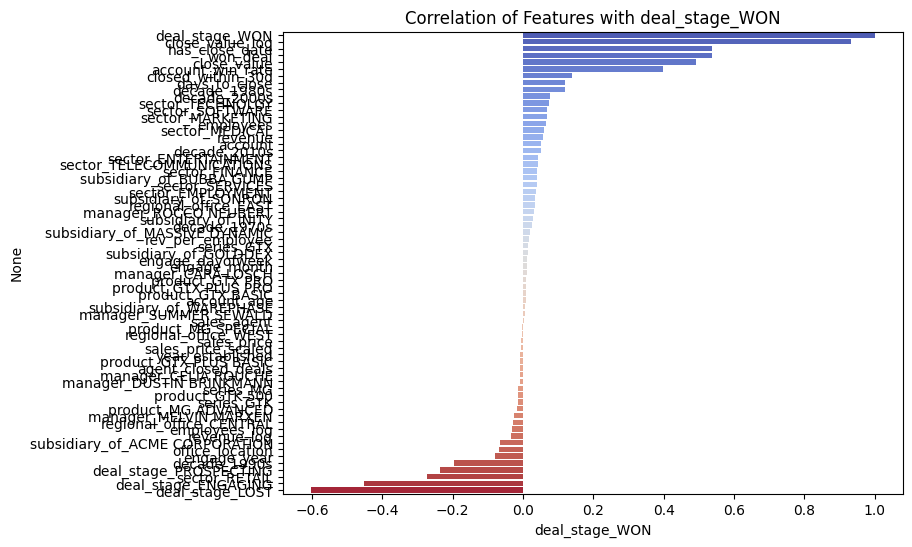

In [30]:
target = "deal_stage_WON"
corr = merged_df.corr(numeric_only=True)[target].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr, y=corr.index, palette="coolwarm")
plt.title(f"Correlation of Features with {target}")
plt.show()

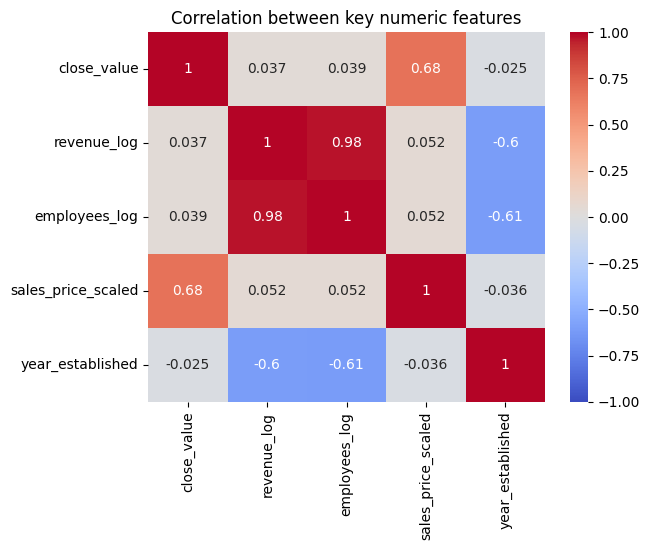

In [31]:
keep = ['close_value','revenue_log','employees_log','sales_price_scaled',
        'year_established']  # adjust as needed
sub = merged_df[ [c for c in keep if c in merged_df.columns] ].select_dtypes(include=[np.number])
sns.heatmap(sub.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation between key numeric features')
plt.show()

In [32]:
# Look for deal-related columns
cols = [c for c in merged_df.columns if "deal" in c.lower() or "stage" in c.lower() or "won" in c.lower() or "close" in c.lower()]
print(cols)

# Peek at their unique values
for c in cols:
    print(f"\nColumn: {c}")
    print(merged_df[c].value_counts(dropna=False).head(10))

['close_date', 'close_value', 'has_close_date', 'close_value_log', 'deal_stage_ENGAGING', 'deal_stage_LOST', 'deal_stage_PROSPECTING', 'deal_stage_WON', 'days_to_close', 'closed_within_30d', 'agent_closed_deals', 'won_deal']

Column: close_date
close_date
NaT           2089
2017-05-22      41
2017-06-11      36
2017-11-19      34
2017-08-11      34
2017-05-26      34
2017-05-20      34
2017-11-07      33
2017-05-06      33
2017-05-27      33
Name: count, dtype: int64

Column: close_value
close_value
0.0     2473
NaN     2089
54.0      80
53.0      57
57.0      55
59.0      54
55.0      52
56.0      48
51.0      45
60.0      44
Name: count, dtype: int64

Column: has_close_date
has_close_date
1    6711
0    2089
Name: count, dtype: int64

Column: close_value_log
close_value_log
0.000000    2473
NaN         2089
4.007333      80
3.988984      57
4.060443      55
4.094345      54
4.025352      52
4.043051      48
3.951244      45
4.110874      44
Name: count, dtype: int64

Column: deal_sta

In [33]:
merged_df.columns

Index(['sales_agent', 'account', 'engage_date', 'close_date', 'close_value',
       'sales_price', 'year_established', 'revenue', 'employees',
       'office_location', 'has_close_date', 'close_value_log', 'revenue_log',
       'employees_log', 'product_GTK 500', 'product_GTX BASIC',
       'product_GTX PLUS BASIC', 'product_GTX PLUS PRO', 'product_GTX PRO',
       'product_MG ADVANCED', 'product_MG SPECIAL', 'manager_CARA LOSCH',
       'manager_CELIA ROUCHE', 'manager_DUSTIN BRINKMANN',
       'manager_MELVIN MARXEN', 'manager_ROCCO NEUBERT',
       'manager_SUMMER SEWALD', 'regional_office_CENTRAL',
       'regional_office_EAST', 'regional_office_WEST', 'series_GTK',
       'series_GTX', 'series_MG', 'sector_EMPLOYMENT', 'sector_ENTERTAINMENT',
       'sector_FINANCE', 'sector_MARKETING', 'sector_MEDICAL', 'sector_RETAIL',
       'sector_SERVICES', 'sector_SOFTWARE', 'sector_TECHNOLGY',
       'sector_TELECOMMUNICATIONS', 'subsidiary_of_ACME CORPORATION',
       'subsidiary_of_BUBBA

In [34]:
label = "won_deal"

leak_cols = ["deal_stage_WON", "deal_stage_LOST", "deal_stage_ENGAGING", "deal_stage_PROSPECTING", "close_date", "close_value", "has_close_date", "close_value_log", "days_to_close", "closed_within_30d", "agent_closed_deals"]

merged_df = merged_df.drop(columns=[col for col in leak_cols if col in merged_df.columns])

merged_df.columns

Index(['sales_agent', 'account', 'engage_date', 'sales_price',
       'year_established', 'revenue', 'employees', 'office_location',
       'revenue_log', 'employees_log', 'product_GTK 500', 'product_GTX BASIC',
       'product_GTX PLUS BASIC', 'product_GTX PLUS PRO', 'product_GTX PRO',
       'product_MG ADVANCED', 'product_MG SPECIAL', 'manager_CARA LOSCH',
       'manager_CELIA ROUCHE', 'manager_DUSTIN BRINKMANN',
       'manager_MELVIN MARXEN', 'manager_ROCCO NEUBERT',
       'manager_SUMMER SEWALD', 'regional_office_CENTRAL',
       'regional_office_EAST', 'regional_office_WEST', 'series_GTK',
       'series_GTX', 'series_MG', 'sector_EMPLOYMENT', 'sector_ENTERTAINMENT',
       'sector_FINANCE', 'sector_MARKETING', 'sector_MEDICAL', 'sector_RETAIL',
       'sector_SERVICES', 'sector_SOFTWARE', 'sector_TECHNOLGY',
       'sector_TELECOMMUNICATIONS', 'subsidiary_of_ACME CORPORATION',
       'subsidiary_of_BUBBA GUMP', 'subsidiary_of_GOLDDEX',
       'subsidiary_of_INITY', 'subsidiar

In [35]:
# finding all non-numeric columns leftover
non_numeric = merged_df.select_dtypes(exclude=['number']).columns
print(non_numeric)

Index(['engage_date'], dtype='object')


In [36]:
merged_df.drop("engage_date", axis=1) # dropping because its still not numerical (can't be used by model) and thus far we haven't been able to find any relevancy


,sales_agent,account,sales_price,year_established,revenue,employees,office_location,revenue_log,employees_log,product_GTK 500,...,decade_1990s,decade_2000s,decade_2010s,engage_year,engage_month,engage_dayofweek,account_age,rev_per_employee,won_deal,account_win_rate
0,20,8,1096,2001.0,718.62,2448.0,14,6.578723,7.803435,0,...,0,1,0,2016.0,10.0,3.0,24.0,0.293554,1,0.920792
1,6,38,4821,2002.0,3178.24,4540.0,14,8.064397,8.420903,0,...,0,1,0,2016.0,10.0,1.0,23.0,0.700053,1,0.941176
2,6,8,55,2001.0,718.62,2448.0,14,6.578723,7.803435,0,...,0,1,0,2016.0,10.0,1.0,24.0,0.293554,1,0.920792
3,20,10,550,1998.0,2714.90,2641.0,14,7.906879,7.879291,0,...,1,0,0,2016.0,10.0,1.0,27.0,1.027982,1,0.966942
4,29,34,550,1982.0,792.46,1299.0,14,6.676403,7.170120,0,...,0,0,0,2016.0,10.0,1.0,43.0,0.610054,1,0.873563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,25,35,3393,1995.0,1698.20,3492.0,14,7.437913,8.158516,0,...,1,0,0,NaN,NaN,NaN,30.0,0.486312,0,0.118769
8796,25,35,3393,1995.0,1698.20,3492.0,14,7.437913,8.158516,0,...,1,0,0,NaN,NaN,NaN,30.0,0.486312,0,0.118769
8797,25,35,3393,1995.0,1698.20,3492.0,14,7.437913,8.158516,0,...,1,0,0,NaN,NaN,NaN,30.0,0.486312,0,0.118769
8798,25,35,3393,1995.0,1698.20,3492.0,14,7.437913,8.158516,0,...,1,0,0,NaN,NaN,NaN,30.0,0.486312,0,0.118769


In [ ]:
#install the xgboost specifically for the XGBClassifier model
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Opportunity win prediction model

#import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

In [39]:
# X = df.drop(columns=[label])
# y = df[label]

y = merged_df[label].astype(int)          # target
X = merged_df.drop(columns=[label])       # features
X = X.select_dtypes(include='number')         # keep only numeric features

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
X = imp.fit_transform(X)

In [ ]:
# Split training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify preserves class proportions

# Models and baseline hyperparameters to be used for model selection:
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators = 400,
        max_depth = 12,
        min_samples_split = 5,
        n_jobs = -1,
        random_state = 42,
        class_weight="balanced"
    ),
    "XGBoost": XGBClassifier(
        n_estimators = 600,
        max_depth = 6,
        learning_rate = 0.05,
        subsample = 0.9,
        colsample_bytree = 0.9,
        reg_lambda = 1.0,
        objective = "binary:logistic",
        eval_metric = "logloss",
        n_jobs = -1,
        random_state = 42
    ),
    "LogReg_L2": LogisticRegression(
        max_iter=2000,
        n_jobs = -1,
        C = 0.5,
        class_weight="balanced"
    )
}

#CV strategy 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#hyperparameters for the implications of RandomizedSearchCV and GridSearchCV for each model interation
param_spaces = {
    "RandomForest": {
        "n_estimators": randint(200, 800),
        "max_depth": randint(4, 20),
        "min_samples_split": randint(2, 10),
    },
    "XGBoost": {
        "n_estimators": randint(300, 900),
        "max_depth": randint(3, 10),
        "learning_rate": uniform(0.01, 0.2),
        "subsample": uniform(0.6, 0.4),
        "colsample_bytree": uniform(0.6, 0.4)
    },
    "LogReg_L2": {
        "C": uniform(0.01, 2.0),
        "penalty": ["l2"]
    }
}

best_models = {}

#initialize RandomizedSearchCV for hyperparameter tuning
for name, model in models.items():
    print(f"\nRandom Search for {name}")
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_spaces[name],
        n_iter=20,               #random tries
        scoring="roc_auc",       #optimize ROC-AUC
        cv=cv,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best params for {name} (Random Search):", random_search.best_params_)

#helper function to evaluate each model
def evaluate(name, model):
    
    print("Fitting model:", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        y_proba = MinMaxScaler().fit_transform(model.decision_function(X_test).reshape(-1,1)).ravel()
    else:
        y_proba = y_pred  
        
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n=== {name} ===")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}   Recall: {rec:.3f}   F1: {f1:.3f}   ROC-AUC: {auc:.3f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    return acc



Random Search for RandomForest
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for RandomForest (Random Search): {'max_depth': 19, 'min_samples_split': 2, 'n_estimators': 330}

Random Search for XGBoost
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for XGBoost (Random Search): {'colsample_bytree': np.float64(0.8430179407605753), 'learning_rate': np.float64(0.04410482473745831), 'max_depth': 9, 'n_estimators': 573, 'subsample': np.float64(0.9795542149013333)}

Random Search for LogReg_L2
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for LogReg_L2 (Random Search): {'C': np.float64(0.4346782213565523), 'penalty': 'l2'}


In [41]:
results = {name: evaluate(name, m) for name, m in models.items()}

best_model_name = max(results, key=results.get)
print(f"\nBest model by Accuracy: {best_model_name} ({results[best_model_name]:.3f})")

Fitting model: RandomForest

=== RandomForest ===
Accuracy:  0.955
Precision: 0.944   Recall: 1.000   F1: 0.971   ROC-AUC: 0.969

Confusion Matrix:
[[ 338   80]
 [   0 1342]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.809     0.894       418
           1      0.944     1.000     0.971      1342

    accuracy                          0.955      1760
   macro avg      0.972     0.904     0.933      1760
weighted avg      0.957     0.955     0.953      1760

Fitting model: XGBoost

=== XGBoost ===
Accuracy:  0.953
Precision: 0.952   Recall: 0.988   F1: 0.970   ROC-AUC: 0.969

Confusion Matrix:
[[ 351   67]
 [  16 1326]]

Classification Report:
              precision    recall  f1-score   support

           0      0.956     0.840     0.894       418
           1      0.952     0.988     0.970      1342

    accuracy                          0.953      1760
   macro avg      0.954     0.914     0.932      1760
weighted avg 